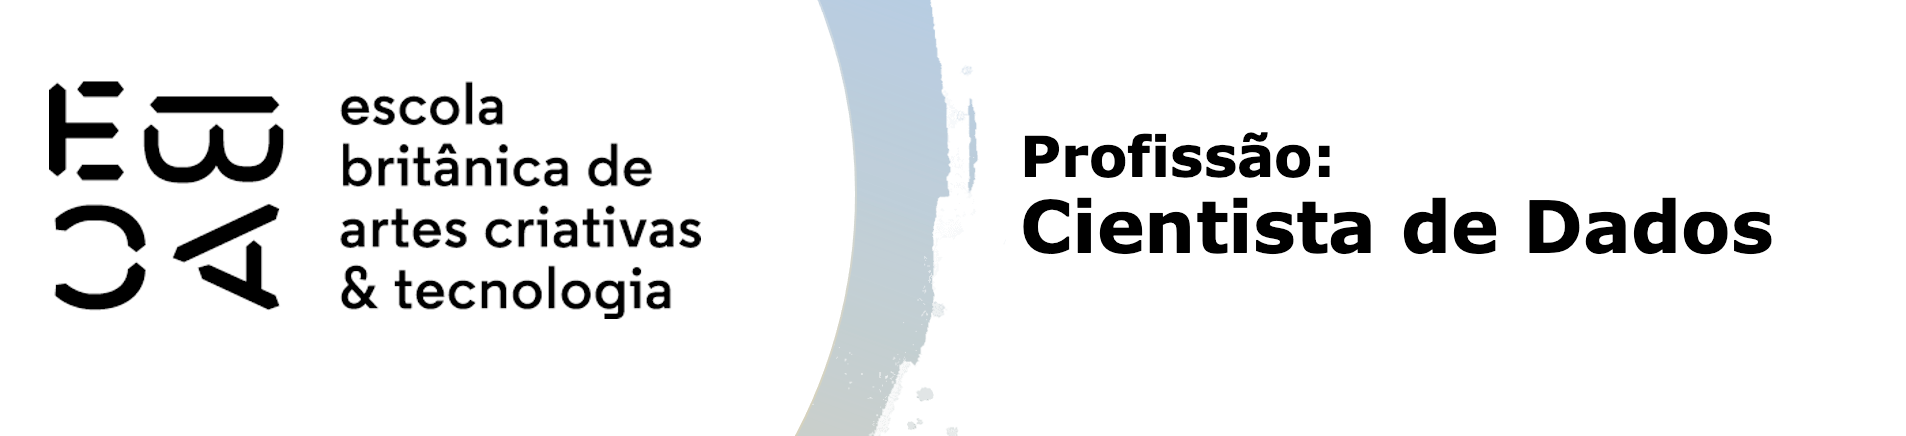

# Tarefa II

Ainda sobre a base da NFP vista na tarefa passada:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


## Criando variáveis

**Variáveis temporais**: É possível que haja alguma regra de liberação de créditos de acordo com o dia do mês, o dia da semana, fim de semana (sim ou não), ou até alterações temporais da regra. Vamos criar as seguintes variáveis para testar estas hipóteses:

- Dia da semana
- Dummy para fim de semana
- Dia do mês
- Mês (já na base)
- Trimestre
- Ano (já na base)

**Valor da nota**: Vamos criar também algumas variáveis para resumir o valor da nota, e posteriormente criar uma intuição sobre categorizações de variáveis contínuas.

- Crie categorizações da variável ```Valor NF```, por quantís, em 5, 10, 20 e 50 categorias.

In [5]:
import pandas as pd

df['Créditos'] = pd.to_datetime(df['Créditos'])

df['Dia_Semana'] = df['Créditos'].dt.dayofweek 
df['Fim_de_Semana'] = df['Créditos'].dt.weekday // 5  
df['Dia_Mes'] = df['Créditos'].dt.day 
df['Trimestre'] = df['Créditos'].dt.quarter  

df['Valor_NF_5_Categorias'] = pd.qcut(df['Valor NF'], q=5, labels=False)
df['Valor_NF_10_Categorias'] = pd.qcut(df['Valor NF'], q=10, labels=False)
df['Valor_NF_20_Categorias'] = pd.qcut(df['Valor NF'], q=20, labels=False)
df['Valor_NF_50_Categorias'] = pd.qcut(df['Valor NF'], q=50, labels=False)


In [6]:
df

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,...,flag_credito,categoria,Dia_Semana,Fim_de_Semana,Dia_Mes,Trimestre,Valor_NF_5_Categorias,Valor_NF_10_Categorias,Valor_NF_20_Categorias,Valor_NF_50_Categorias
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,1970-01-01 00:00:00.000000000,Liberado,2017,1,...,0,Mercado,3,0,1,1,1,3,7,17
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,1970-01-01 00:00:00.000000000,Liberado,2017,1,...,0,Auto posto,3,0,1,1,2,5,11,28
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,1970-01-01 00:00:00.000000000,Liberado,2017,1,...,1,Restaurantes,3,0,1,1,1,3,7,19
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1970-01-01 00:00:00.000000001,Liberado,2017,1,...,1,Restaurantes,3,0,1,1,3,7,15,38
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,1970-01-01 00:00:00.000000002,Liberado,2017,1,...,1,Restaurantes,3,0,1,1,3,7,15,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187641,22.172.203/0004-40,B.BLEND MAQUINAS E BEBIDAS S. A.,180264,2021-01-07,252.84,2021-01-07,1970-01-01 00:00:00.000000000,Liberado,2021,2,...,0,não definido,3,0,1,1,4,8,17,44
187642,71.676.316/0005-70,SUPERMERCADOS MAMBO LTDA.,348953,2021-01-07,373.65,2021-01-07,1970-01-01 00:00:00.000000000,Liberado,2021,2,...,0,Mercado,3,0,1,1,4,9,18,46
187643,61.585.865/0240-93,RAIADROGASIL S/A,190447,2021-01-07,130.71,2021-01-07,1970-01-01 00:00:00.000000000,Liberado,2021,2,...,0,Farmácia,3,0,1,1,3,7,15,39
187644,67.616.128/0001-55,AYUMI SUPERMERCADOS LTDA - 1,51004,2021-01-07,43.16,2021-01-07,1970-01-01 00:00:00.000000000,Liberado,2021,2,...,0,Mercado,3,0,1,1,2,5,10,26


## Calcule o IV de todas essas variáveis

Sugestão: Construa um metadados e tente utilizar uma função como a que foi utilizada durante a aula. Você vai conseguir fazer esse cálculo para as variáveis uma a uma, mas em casos reais em que vamos mais além na criação de variáveis, podemos ter centenas, ou até milhares de variáveis, esses cálculos *precisam* ser automáticos nesses casos.

In [12]:
import pandas as pd
import numpy as np

def calcular_iv(df, feature, target):
    lst = []
    unique_values = df[feature].unique()
    for val in unique_values:
        lst.append({
            'Valor': val,
            'Eventos': df[df[feature] == val]['Ano'].sum(),
            'Não_Eventos': df[df[feature] == val]['Ano'].count() - df[df[feature] == val]['Ano'].sum()
        })

    dset = pd.DataFrame(lst)
    dset['Proporcao_Eventos'] = dset['Eventos'] / dset['Eventos'].sum()
    dset['Proporcao_Não_Eventos'] = dset['Não_Eventos'] / dset['Não_Eventos'].sum()
    dset['IV'] = np.log(dset['Proporcao_Eventos'] / dset['Proporcao_Não_Eventos']) * (dset['Proporcao_Eventos'] - dset['Proporcao_Não_Eventos'])
    iv = dset['IV'].sum()

    return iv

iv_coluna_5_categorias = calcular_iv(df, 'Créditos', 'Ano')
print(f"IV da coluna 'Créditos': {iv_coluna_5_categorias}")


IV da coluna 'Créditos': 8.96631263913227e-15


## Descritiva simples no tempo

Para compor a análise que virá a seguir, faça uma análise descritiva básica no tempo - utilize trimestre como agregação (ou uma média móvel por trimestre, como preferir) e avalie graficamente:

- A quantidade de notas registradas na base por período
- A quantidade de notas por categoria e por período
- A proporção de notas com crédito por categoria por período

/home/carolina/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1399: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/home/carolina/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1399: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/home/carolina/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1399: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/home/carolina/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1399: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/home/carolina/.local/lib/python3.10/site-packages/panda

<Figure size 1000x600 with 0 Axes>

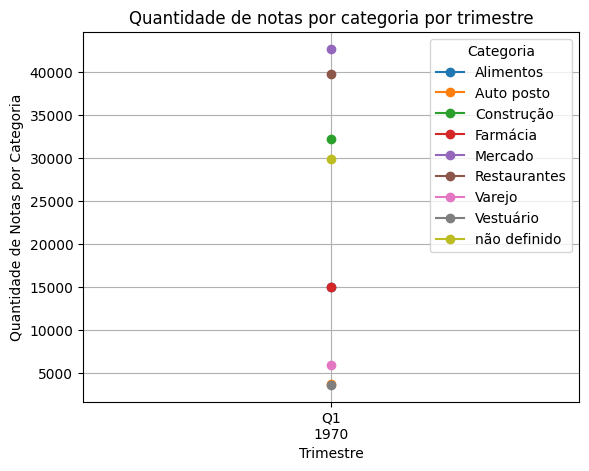

/home/carolina/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1399: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/home/carolina/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1399: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/home/carolina/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1399: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/home/carolina/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1399: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/home/carolina/.local/lib/python3.10/site-packages/panda

<Figure size 1000x600 with 0 Axes>

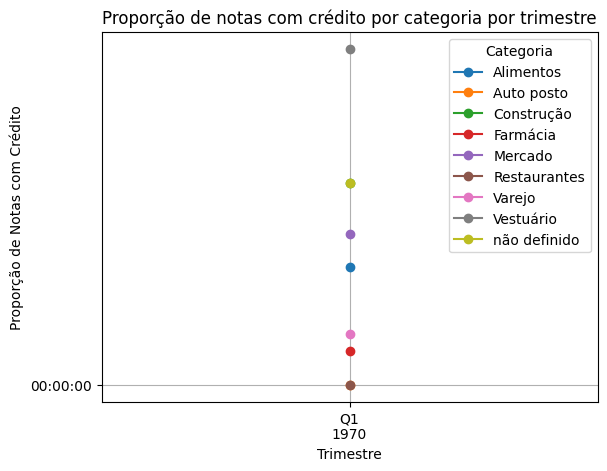

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


df['Créditos'] = pd.to_datetime(df['Créditos'])

"""# 1. Quantidade de notas por trimestre
df['Trimestre'] = df['Créditos'].dt.to_period('Q')
notas_por_trimestre = df.groupby('Trimestre').size()

plt.figure(figsize=(10, 6))
notas_por_trimestre.plot(kind='line', marker='o', color='blue')
plt.title('Quantidade de notas registradas por trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Quantidade de Notas')
plt.grid(True)
plt.show()"""""

# 2. 
notas_por_categoria_trimestre = df.groupby(['Trimestre', 'categoria']).size().unstack()

plt.figure(figsize=(10, 6))
notas_por_categoria_trimestre.plot(kind='line', marker='o')
plt.title('Quantidade de notas por categoria por trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Quantidade de Notas por Categoria')
plt.legend(title='Categoria')
plt.grid(True)
plt.show()
#3
proporcao_credito_categoria_trimestre = df.groupby(['Trimestre', 'categoria'])['Créditos'].mean().unstack()

plt.figure(figsize=(10, 6))
proporcao_credito_categoria_trimestre.plot(kind='line', marker='o')
plt.title('Proporção de notas com crédito por categoria por trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Proporção de Notas com Crédito')
plt.legend(title='Categoria')
plt.grid(True)
plt.show()


## Avalie o WOE e o IV no tempo

Avalie o WOE e o IV no tempo da variável ```categoria```.

In [24]:
import pandas as pd
import numpy as np

df = pd.read_pickle('base_nfp.pkl')

# Função para calcular WOE e IV
def calculate_woe_iv(df, variable, target):
    events_non_events = df.groupby(variable)[target].value_counts().unstack().fillna(0)
    events_non_events['event_rate'] = events_non_events[1] / events_non_events.sum(axis=1)
    events_non_events['non_event_rate'] = events_non_events[0] / events_non_events.sum(axis=1)
    events_non_events['WOE'] = np.log(events_non_events['non_event_rate'] / events_non_events['event_rate'])
    events_non_events['IV'] = (events_non_events['non_event_rate'] - events_non_events['event_rate']) * events_non_events['WOE']
    IV_total = events_non_events['IV'].sum()
    return events_non_events[['non_event_rate', 'event_rate', 'WOE', 'IV']], IV_total


woe_situacao_credito, iv_situacao_credito = calculate_woe_iv(df, 'Situação do Crédito', 'Créditos')

# Calculo
woe_ano, iv_ano = calculate_woe_iv(df, 'categoria', 'Créditos')

woe_semestre, iv_semestre = calculate_woe_iv(df, 'Semestre', 'Créditos')


print("Situação do Crédito:")
print(woe_situacao_credito)
print(f"IV Total: {iv_situacao_credito}\n")

print("categoria:")
print(woe_ano)
print(f"IV Total: {iv_ano}\n")

print("Semestre:")
print(woe_semestre)
print(f"IV Total: {iv_semestre}")

Situação do Crédito:
Créditos             non_event_rate  event_rate       WOE        IV
Situação do Crédito                                                
A Calcular                 1.000000    0.000000       inf       inf
Calculado                  0.576145    0.000639  6.804245  3.915882
Liberado                   0.548221    0.000415  7.185098  3.936037
IV Total: inf

categoria:
Créditos      non_event_rate  event_rate       WOE        IV
categoria                                                   
Alimentos           0.139840    0.001003  4.937826  0.685552
Auto posto          0.926538    0.000271  8.136811  7.536861
Construção          0.571566    0.000341  7.423568  4.240526
Farmácia            0.672958    0.000736  6.817831  4.583097
Mercado             0.536058    0.000562  6.860270  3.673647
Restaurantes        0.569348    0.000176  8.081166  4.599570
Varejo              0.824695    0.000169  8.490644  7.000754
Vestuário           0.501938    0.000000       inf       inf
não

## Conclua

- Quais categorias parece ter maior proporção de notas com retornos maiores que zero?
- Essas diferenças são estáveis no tempo?

Dicas:<br>
- Considere que a quantidade de notas vem aumentando
- Considere que há períodos bem atípicos no histórico
- Considere que a partir de janeiro de 2020 o público é mais parecido com o público atual (2022), seja por pandemia, seja por crescimento do público, e considere os dados dessa data em diante na sua conclusão.

A maioria das categorias tiveram um bom desempenho, a categoria alimentos teve um IV menor comparado com os demais. mesmo com o periodo da pandemia e pos  os numeros seguem crescendo mais 